<a href="https://colab.research.google.com/github/myusuf1982/Prediksi-Saham/blob/main/5_input_lstm_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
# load data
data = pd.read_csv("/content/drive/My Drive/GOOG-year.csv")
#data =data[:50] # Juml row maksimal yang mau diambil sample 15 row

# memilih kolom open dan close saja
data = data[['Open', 'Close','High','Low','Adj Close']] # all = Tanggal,Open,High,Low,Close,Adj Close,Volume

data.head(3)

,Open,Close,High,Low,Adj Close
0,778.200012,768.700012,781.650024,763.450012,768.700012
1,767.250000,762.130005,769.950012,759.030029,762.130005
2,750.659973,762.020020,770.359985,750.560974,762.020020


In [216]:
# membuat skala data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(len(data) * 0.9)
train_data = data[:train_size] # 90% = 226

test_data = data[train_size:]


# membuat dataset dengan input dan output
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data) - look_back): # print(len(data)) =252
        dataX.append(data[i:(i + look_back),:])
        dataY.append(data[i + look_back, :])
    return np.array(dataX), np.array(dataY)

# membuat dataset dengan input 2 hari sebelumnya dan output hari berikutnya
look_back = 2
trainX, trainY = create_dataset(train_data, look_back) #226,2
testX, testY = create_dataset(test_data, look_back)   #252,2


1/1 [==============================] - 0s 401ms/step
mean_absolute_error = 0.024128596117907887


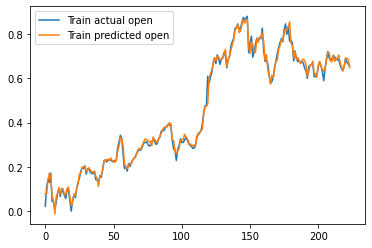

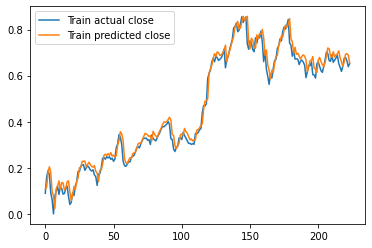

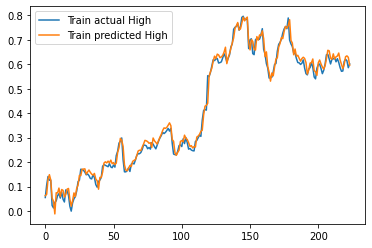

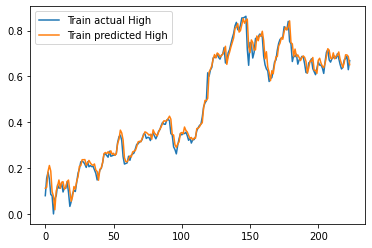

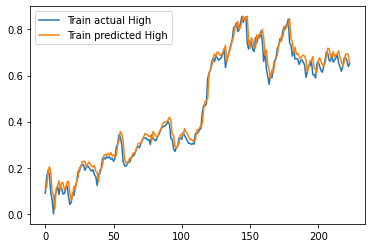

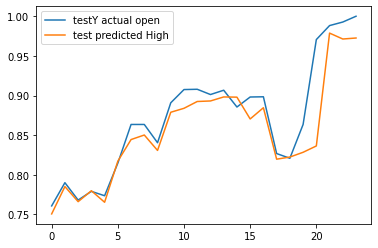

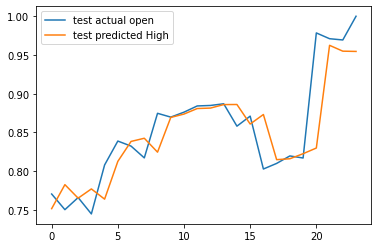

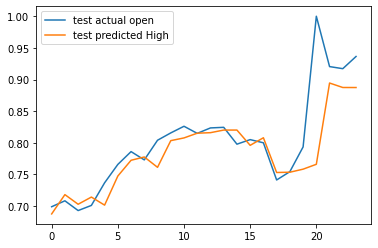

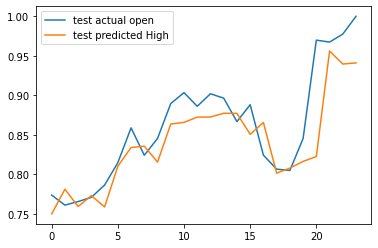

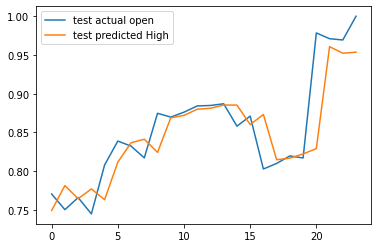

In [219]:
from keras.backend import dropout
# membuat model LSTM
from keras.optimizers import RMSprop
optimizer= RMSprop(learning_rate=0.001)

model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 5))) # jumlah kolom
#model.add(LSTM(8, input_shape=(look_back, 5), return_sequences=True)) # jumlah kolom
#model.add(dropout(0.2)) # masih error


model.add(Dense(5))
model.compile(loss='mean_squared_error', optimizer=optimizer)
#model.compile(loss='mean_squared_error','adam')

# melatih model dengan data training
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

# melakukan prediksi dengan data testing
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)                                      #error

# inverting data kembali ke nilai asli
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)                       #Error
testY = scaler.inverse_transform(testY)                              #error

#MAE
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(testY, testPredict)
print("mean_absolute_error = "+ str(mae))



# plot hasil prediksi dengan data training
plt.plot(trainY[:,0], label='Train actual open')
plt.plot(trainPredict[:,0], label='Train predicted open')
plt.legend()
plt.show()

plt.plot(trainY[:,1], label='Train actual close')
plt.plot(trainPredict[:,1], label='Train predicted close')
plt.legend()
plt.show()

plt.plot(trainY[:,2], label='Train actual High')
plt.plot(trainPredict[:,2], label='Train predicted High')
plt.legend()
plt.show()

plt.plot(trainY[:,3], label='Train actual Low')
plt.plot(trainPredict[:,3], label='Train predicted Low')
plt.legend()
plt.show()


plt.plot(trainY[:,4], label='Train actual Adj Close')
plt.plot(trainPredict[:,4], label='Train predicted Adj Close')
plt.legend()
plt.show()


# plot hasil prediksi dengan data testing
   
plt.plot(testY[:,0], label='testY actual open')
plt.plot(testPredict[:,0], label='test predicted open')
plt.legend()
plt.show()

 
plt.plot(testY[:,1], label='test actual Close')
plt.plot(testPredict[:,1], label='test predicted Close')
plt.legend()
plt.show()


plt.plot(testY[:,2], label='test actual High')
plt.plot(testPredict[:,2], label='test predicted High')
plt.legend()
plt.show()
 
plt.plot(testY[:,3], label='test actual Low')
plt.plot(testPredict[:,3], label='test predicted Low')
plt.legend()
plt.show()
 
plt.plot(testY[:,4], label='test actual Adj Close')
plt.plot(testPredict[:,4], label='test predicted Adj Close')
plt.legend()
plt.show()
